

# Problem Statement



A banking institution wants to develop a model that predicts whether a customer will subscribe to a term deposit or not based on their banking behaviour. They have collected a dataset of past customers with information about their demographics, account details, and whether they subscribed to a term deposit or not. The bank wants to build a model using Logistic Regression to predict whether a new customer will subscribe to a term deposit or not based on their banking behaviour. The dataset used for this problem statement is the "Bank Marketing Data Set" which contains information on customers of a bank. The dataset includes 17 attributes such as customer demographics, account details, and whether the customer subscribed to a term deposit or not. Each customer is classified as either yes or no based on whether they subscribed to a term deposit or not.

Dataset: [https://drive.google.com/file/d/18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ/view?usp=sharing](https://)

# Importing necessary libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Data Loading and Cleaning


In [59]:
url = 'https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv'
data = pd.read_csv(url)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [60]:
print('Shape of the data is: ',data.shape)

Shape of the data is:  (11162, 17)


In [61]:
#data columns
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [62]:
#Class Distribution
data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [63]:
#Normalizing the frequency table of 'Deposit' variable
data['deposit'].value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [64]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [65]:
# Shuffle the data
data=data.sample(frac=1).reset_index(drop=True)

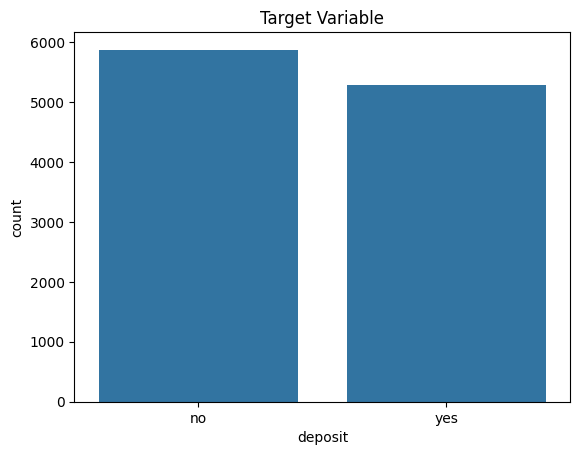

In [66]:
sns.countplot(x="deposit", data=data)
plt.title("Target Variable")
plt.show()

In [67]:
# Copy original dataframe
data_copy = data.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
data_copy[num_cols] = scaler.fit_transform(data_copy[num_cols])

data_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,-0.942844,technician,single,secondary,no,-0.427108,no,no,cellular,-1.503265,feb,276,-0.186785,-0.481184,-0.363260,unknown,no
1,-1.362560,admin.,single,tertiary,no,-0.405715,no,no,cellular,1.228209,may,68,-0.554168,-0.481184,-0.363260,unknown,no
2,-0.774958,management,single,tertiary,no,-0.307428,no,no,unknown,1.584488,may,187,0.180598,-0.481184,-0.363260,unknown,no
3,-0.187357,admin.,single,secondary,no,-0.404784,no,no,cellular,-1.384505,feb,277,-0.554168,-0.481184,-0.363260,unknown,no
4,0.148416,management,married,primary,no,-0.454703,yes,no,cellular,-0.196908,may,133,-0.554168,2.286545,0.945695,failure,no


In [68]:
#Encode Categorical Value

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(data_copy[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
data_copy = data_copy.drop(cat_cols ,axis=1)
data_copy = pd.concat([df_encoded, data_copy], axis=1)

# Encode target value
data_copy['deposit'] = data_copy['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', data_copy.shape)
data_copy.head()

Shape of dataframe: (11162, 52)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,deposit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.942844,-0.427108,-1.503265,276,-0.186785,-0.481184,-0.363260,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.362560,-0.405715,1.228209,68,-0.554168,-0.481184,-0.363260,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.774958,-0.307428,1.584488,187,0.180598,-0.481184,-0.363260,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.187357,-0.404784,-1.384505,277,-0.554168,-0.481184,-0.363260,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.148416,-0.454703,-0.196908,133,-0.554168,2.286545,0.945695,0


# Preparing the train and test data

In [69]:
# Select Features
feature = data_copy.drop('deposit', axis=1)

# Select Target
target = data_copy['deposit']

X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 51)
Shape of testing feature: (2233, 51)
Shape of training label: (8929,)
Shape of training label: (2233,)


# Fitting the model and predicting the values

---



In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# run Logistic Regression model
model = LogisticRegression()

# fitting the model
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [72]:
# predicting the values
y_scores = model.predict(X_test_scaled)
y_scores

array([1, 1, 0, ..., 1, 1, 0])


# Getting the metrics to check our model performance

In [73]:
accuracy = accuracy_score(y_test, y_scores)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8338557993730408


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1188
           1       0.83      0.81      0.82      1045

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233

ROC_AUC_SCORE is 0.8322213361687045


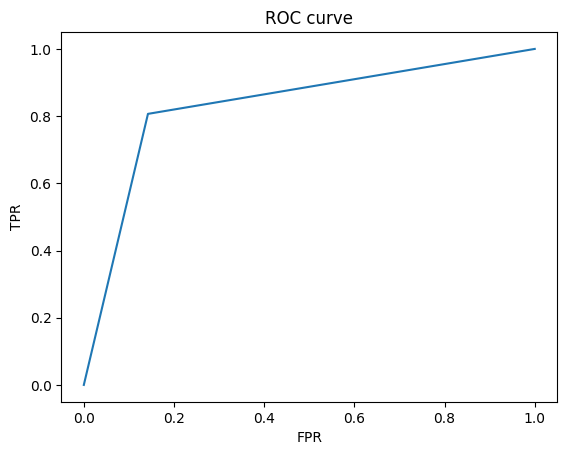

In [74]:
# getting the auc roc curve
auc = roc_auc_score(y_test, y_scores)
print('Classification Report:')
print(classification_report(y_test,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores))

#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Confusion Matrix:
 [[1019  169]
 [ 202  843]]


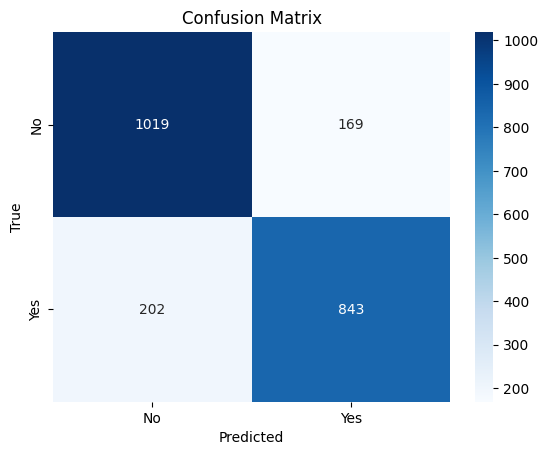

In [75]:
# Confusion Matrix
conf_m = confusion_matrix(y_test, y_scores)
print("Confusion Matrix:\n", conf_m)

sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()